# LDA parameter optimisation

What has to be optimised:  
1. Number of topics for LDA 
2. Which topics can be merged
3. Vocabulary size

Packages to install:  

* The python package 'gensim' is used to implement LDA. This has certain metrics which the scikit-learn implementation does not have. Installation instructions can be found [here](https://radimrehurek.com/gensim/install.html).
* pyLDAvis is used to visualize the topic clusters. Installation instructions can be found [here](https://pyldavis.readthedocs.io/en/latest/readme.html)
* [Spacy](https://spacy.io/usage/), an NLP tool for lemmatization. Also execute the code `python3 -m spacy download en` to download the English language model
* NumPy, pymongo, pandas, matplotlib, nltk and sklearn

In [47]:
# imports

from __future__ import print_function
from time import time
import numpy as np
import pandas as pd
from pymongo import MongoClient
import pickle 
import random

# Sklearn
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re, nltk, spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
from pyLDAvis import gensim as pyLDAvisgensim
import matplotlib.pyplot as plt
import psycopg2

conn = psycopg2.connect(database="media_database", user = "deb", password = "Deb@12345", host = "act4dgem.cse.iitd.ac.in", port = "5432")

print ("Opened database successfully")
cur = conn.cursor()

Opened database successfully


The next cell contains code to read newspapers from the MongoDB database. Enter the database name when prompted, which contains the articles in media-db, eg "DigitalIndia_articles_Final"

In [2]:
# ---------------------------------------------------------------------------------------------#
sources_list = {"The Hindu": 0, "The Times Of India": 1, "Hindustan Times": 2, "Indian Express": 3, "Deccan Herald": 4, "Telegraph": 5, "The New Indian Express": 6}

client = MongoClient('mongodb://act4dgem.cse.iitd.ac.in:27017')
db = client['eventwise_media-db']
newspaper = ['HINDU', 'TIMESOFINDIA', 'INDIANEXPRESS', 'DECCANHERALD', 'HINDUSTANTIMES', 'TELEGRAPH', 'NEWINDIANEXPRESS']

# ---------------------------------------------------------------------------------------------#
table_name = input('Enter db name: ')
coll = db[table_name]

print("Loading dataset...")
t0 = time()
cursor = coll.find()

doc_set = []
url_doc_set = []
words_doc_set = []
article_data = []

count = 0
for art in cursor:
    count = count + 1
    print('Article# ', count)
    url = art['articleUrl']
    text = art['text']
    
    words = len(text.split())
    doc_set.append(text)
    url_doc_set.append(url)
    words_doc_set.append(words)

print("done in %0.3fs." % (time() - t0))

Enter db name: aadhar_articles_3july
Loading dataset...
Article#  1
Article#  2
Article#  3
Article#  4
Article#  5
Article#  6
Article#  7
Article#  8
Article#  9
Article#  10
Article#  11
Article#  12
Article#  13
Article#  14
Article#  15
Article#  16
Article#  17
Article#  18
Article#  19
Article#  20
Article#  21
Article#  22
Article#  23
Article#  24
Article#  25
Article#  26
Article#  27
Article#  28
Article#  29
Article#  30
Article#  31
Article#  32
Article#  33
Article#  34
Article#  35
Article#  36
Article#  37
Article#  38
Article#  39
Article#  40
Article#  41
Article#  42
Article#  43
Article#  44
Article#  45
Article#  46
Article#  47
Article#  48
Article#  49
Article#  50
Article#  51
Article#  52
Article#  53
Article#  54
Article#  55
Article#  56
Article#  57
Article#  58
Article#  59
Article#  60
Article#  61
Article#  62
Article#  63
Article#  64
Article#  65
Article#  66
Article#  67
Article#  68
Article#  69
Article#  70
Article#  71
Article#  72
Article#  73
Arti

Article#  756
Article#  757
Article#  758
Article#  759
Article#  760
Article#  761
Article#  762
Article#  763
Article#  764
Article#  765
Article#  766
Article#  767
Article#  768
Article#  769
Article#  770
Article#  771
Article#  772
Article#  773
Article#  774
Article#  775
Article#  776
Article#  777
Article#  778
Article#  779
Article#  780
Article#  781
Article#  782
Article#  783
Article#  784
Article#  785
Article#  786
Article#  787
Article#  788
Article#  789
Article#  790
Article#  791
Article#  792
Article#  793
Article#  794
Article#  795
Article#  796
Article#  797
Article#  798
Article#  799
Article#  800
Article#  801
Article#  802
Article#  803
Article#  804
Article#  805
Article#  806
Article#  807
Article#  808
Article#  809
Article#  810
Article#  811
Article#  812
Article#  813
Article#  814
Article#  815
Article#  816
Article#  817
Article#  818
Article#  819
Article#  820
Article#  821
Article#  822
Article#  823
Article#  824
Article#  825
Article#  826
Articl

Article#  1487
Article#  1488
Article#  1489
Article#  1490
Article#  1491
Article#  1492
Article#  1493
Article#  1494
Article#  1495
Article#  1496
Article#  1497
Article#  1498
Article#  1499
Article#  1500
Article#  1501
Article#  1502
Article#  1503
Article#  1504
Article#  1505
Article#  1506
Article#  1507
Article#  1508
Article#  1509
Article#  1510
Article#  1511
Article#  1512
Article#  1513
Article#  1514
Article#  1515
Article#  1516
Article#  1517
Article#  1518
Article#  1519
Article#  1520
Article#  1521
Article#  1522
Article#  1523
Article#  1524
Article#  1525
Article#  1526
Article#  1527
Article#  1528
Article#  1529
Article#  1530
Article#  1531
Article#  1532
Article#  1533
Article#  1534
Article#  1535
Article#  1536
Article#  1537
Article#  1538
Article#  1539
Article#  1540
Article#  1541
Article#  1542
Article#  1543
Article#  1544
Article#  1545
Article#  1546
Article#  1547
Article#  1548
Article#  1549
Article#  1550
Article#  1551
Article#  1552
Article#  

Article#  2233
Article#  2234
Article#  2235
Article#  2236
Article#  2237
Article#  2238
Article#  2239
Article#  2240
Article#  2241
Article#  2242
Article#  2243
Article#  2244
Article#  2245
Article#  2246
Article#  2247
Article#  2248
Article#  2249
Article#  2250
Article#  2251
Article#  2252
Article#  2253
Article#  2254
Article#  2255
Article#  2256
Article#  2257
Article#  2258
Article#  2259
Article#  2260
Article#  2261
Article#  2262
Article#  2263
Article#  2264
Article#  2265
Article#  2266
Article#  2267
Article#  2268
Article#  2269
Article#  2270
Article#  2271
Article#  2272
Article#  2273
Article#  2274
Article#  2275
Article#  2276
Article#  2277
Article#  2278
Article#  2279
Article#  2280
Article#  2281
Article#  2282
Article#  2283
Article#  2284
Article#  2285
Article#  2286
Article#  2287
Article#  2288
Article#  2289
Article#  2290
Article#  2291
Article#  2292
Article#  2293
Article#  2294
Article#  2295
Article#  2296
Article#  2297
Article#  2298
Article#  

Article#  3115
Article#  3116
Article#  3117
Article#  3118
Article#  3119
Article#  3120
Article#  3121
Article#  3122
Article#  3123
Article#  3124
Article#  3125
Article#  3126
Article#  3127
Article#  3128
Article#  3129
Article#  3130
Article#  3131
Article#  3132
Article#  3133
Article#  3134
Article#  3135
Article#  3136
Article#  3137
Article#  3138
Article#  3139
Article#  3140
Article#  3141
Article#  3142
Article#  3143
Article#  3144
Article#  3145
Article#  3146
Article#  3147
Article#  3148
Article#  3149
Article#  3150
Article#  3151
Article#  3152
Article#  3153
Article#  3154
Article#  3155
Article#  3156
Article#  3157
Article#  3158
Article#  3159
Article#  3160
Article#  3161
Article#  3162
Article#  3163
Article#  3164
Article#  3165
Article#  3166
Article#  3167
Article#  3168
Article#  3169
Article#  3170
Article#  3171
Article#  3172
Article#  3173
Article#  3174
Article#  3175
Article#  3176
Article#  3177
Article#  3178
Article#  3179
Article#  3180
Article#  

Article#  3976
Article#  3977
Article#  3978
Article#  3979
Article#  3980
Article#  3981
Article#  3982
Article#  3983
Article#  3984
Article#  3985
Article#  3986
Article#  3987
Article#  3988
Article#  3989
Article#  3990
Article#  3991
Article#  3992
Article#  3993
Article#  3994
Article#  3995
Article#  3996
Article#  3997
Article#  3998
Article#  3999
Article#  4000
Article#  4001
Article#  4002
Article#  4003
Article#  4004
Article#  4005
Article#  4006
Article#  4007
Article#  4008
Article#  4009
Article#  4010
Article#  4011
Article#  4012
Article#  4013
Article#  4014
Article#  4015
Article#  4016
Article#  4017
Article#  4018
Article#  4019
Article#  4020
Article#  4021
Article#  4022
Article#  4023
Article#  4024
Article#  4025
Article#  4026
Article#  4027
Article#  4028
Article#  4029
Article#  4030
Article#  4031
Article#  4032
Article#  4033
Article#  4034
Article#  4035
Article#  4036
Article#  4037
Article#  4038
Article#  4039
Article#  4040
Article#  4041
Article#  

Article#  4680
Article#  4681
Article#  4682
Article#  4683
Article#  4684
Article#  4685
Article#  4686
Article#  4687
Article#  4688
Article#  4689
Article#  4690
Article#  4691
Article#  4692
Article#  4693
Article#  4694
Article#  4695
Article#  4696
Article#  4697
Article#  4698
Article#  4699
Article#  4700
Article#  4701
Article#  4702
Article#  4703
Article#  4704
Article#  4705
Article#  4706
Article#  4707
Article#  4708
Article#  4709
Article#  4710
Article#  4711
Article#  4712
Article#  4713
Article#  4714
Article#  4715
Article#  4716
Article#  4717
Article#  4718
Article#  4719
Article#  4720
Article#  4721
Article#  4722
Article#  4723
Article#  4724
Article#  4725
Article#  4726
Article#  4727
Article#  4728
Article#  4729
Article#  4730
Article#  4731
Article#  4732
Article#  4733
Article#  4734
Article#  4735
Article#  4736
Article#  4737
Article#  4738
Article#  4739
Article#  4740
Article#  4741
Article#  4742
Article#  4743
Article#  4744
Article#  4745
Article#  

Article#  5416
Article#  5417
Article#  5418
Article#  5419
Article#  5420
Article#  5421
Article#  5422
Article#  5423
Article#  5424
Article#  5425
Article#  5426
Article#  5427
Article#  5428
Article#  5429
Article#  5430
Article#  5431
Article#  5432
Article#  5433
Article#  5434
Article#  5435
Article#  5436
Article#  5437
Article#  5438
Article#  5439
Article#  5440
Article#  5441
Article#  5442
Article#  5443
Article#  5444
Article#  5445
Article#  5446
Article#  5447
Article#  5448
Article#  5449
Article#  5450
Article#  5451
Article#  5452
Article#  5453
Article#  5454
Article#  5455
Article#  5456
Article#  5457
Article#  5458
Article#  5459
Article#  5460
Article#  5461
Article#  5462
Article#  5463
Article#  5464
Article#  5465
Article#  5466
Article#  5467
Article#  5468
Article#  5469
Article#  5470
Article#  5471
Article#  5472
Article#  5473
Article#  5474
Article#  5475
Article#  5476
Article#  5477
Article#  5478
Article#  5479
Article#  5480
Article#  5481
Article#  

Article#  6222
Article#  6223
Article#  6224
Article#  6225
Article#  6226
Article#  6227
Article#  6228
Article#  6229
Article#  6230
Article#  6231
Article#  6232
Article#  6233
Article#  6234
Article#  6235
Article#  6236
Article#  6237
Article#  6238
Article#  6239
Article#  6240
Article#  6241
Article#  6242
Article#  6243
Article#  6244
Article#  6245
Article#  6246
Article#  6247
Article#  6248
Article#  6249
Article#  6250
Article#  6251
Article#  6252
Article#  6253
Article#  6254
Article#  6255
Article#  6256
Article#  6257
Article#  6258
Article#  6259
Article#  6260
Article#  6261
Article#  6262
Article#  6263
Article#  6264
Article#  6265
Article#  6266
Article#  6267
Article#  6268
Article#  6269
Article#  6270
Article#  6271
Article#  6272
Article#  6273
Article#  6274
Article#  6275
Article#  6276
Article#  6277
Article#  6278
Article#  6279
Article#  6280
Article#  6281
Article#  6282
Article#  6283
Article#  6284
Article#  6285
Article#  6286
Article#  6287
Article#  

Article#  7014
Article#  7015
Article#  7016
Article#  7017
Article#  7018
Article#  7019
Article#  7020
Article#  7021
Article#  7022
Article#  7023
Article#  7024
Article#  7025
Article#  7026
Article#  7027
Article#  7028
Article#  7029
Article#  7030
Article#  7031
Article#  7032
Article#  7033
Article#  7034
Article#  7035
Article#  7036
Article#  7037
Article#  7038
Article#  7039
Article#  7040
Article#  7041
Article#  7042
Article#  7043
Article#  7044
Article#  7045
Article#  7046
Article#  7047
Article#  7048
Article#  7049
Article#  7050
Article#  7051
Article#  7052
Article#  7053
Article#  7054
Article#  7055
Article#  7056
Article#  7057
Article#  7058
Article#  7059
Article#  7060
Article#  7061
Article#  7062
Article#  7063
Article#  7064
Article#  7065
Article#  7066
Article#  7067
Article#  7068
Article#  7069
Article#  7070
Article#  7071
Article#  7072
Article#  7073
Article#  7074
Article#  7075
Article#  7076
Article#  7077
Article#  7078
Article#  7079
Article#  

Article#  7656
Article#  7657
Article#  7658
Article#  7659
Article#  7660
Article#  7661
Article#  7662
Article#  7663
Article#  7664
Article#  7665
Article#  7666
Article#  7667
Article#  7668
Article#  7669
Article#  7670
Article#  7671
Article#  7672
Article#  7673
Article#  7674
Article#  7675
Article#  7676
Article#  7677
Article#  7678
Article#  7679
Article#  7680
Article#  7681
Article#  7682
Article#  7683
Article#  7684
Article#  7685
Article#  7686
Article#  7687
Article#  7688
Article#  7689
Article#  7690
Article#  7691
Article#  7692
Article#  7693
Article#  7694
Article#  7695
Article#  7696
Article#  7697
Article#  7698
Article#  7699
Article#  7700
Article#  7701
Article#  7702
Article#  7703
Article#  7704
Article#  7705
Article#  7706
Article#  7707
Article#  7708
Article#  7709
Article#  7710
Article#  7711
Article#  7712
Article#  7713
Article#  7714
Article#  7715
Article#  7716
Article#  7717
Article#  7718
Article#  7719
Article#  7720
Article#  7721
Article#  

Article#  8491
Article#  8492
Article#  8493
Article#  8494
Article#  8495
Article#  8496
Article#  8497
Article#  8498
Article#  8499
Article#  8500
Article#  8501
Article#  8502
Article#  8503
Article#  8504
Article#  8505
Article#  8506
Article#  8507
Article#  8508
Article#  8509
Article#  8510
Article#  8511
Article#  8512
Article#  8513
Article#  8514
Article#  8515
Article#  8516
Article#  8517
Article#  8518
Article#  8519
Article#  8520
Article#  8521
Article#  8522
Article#  8523
Article#  8524
Article#  8525
Article#  8526
Article#  8527
Article#  8528
Article#  8529
Article#  8530
Article#  8531
Article#  8532
Article#  8533
Article#  8534
Article#  8535
Article#  8536
Article#  8537
Article#  8538
Article#  8539
Article#  8540
Article#  8541
Article#  8542
Article#  8543
Article#  8544
Article#  8545
Article#  8546
Article#  8547
Article#  8548
Article#  8549
Article#  8550
Article#  8551
Article#  8552
Article#  8553
Article#  8554
Article#  8555
Article#  8556
Article#  

Article#  9438
Article#  9439
Article#  9440
Article#  9441
Article#  9442
Article#  9443
Article#  9444
Article#  9445
Article#  9446
Article#  9447
Article#  9448
Article#  9449
Article#  9450
Article#  9451
Article#  9452
Article#  9453
Article#  9454
Article#  9455
Article#  9456
Article#  9457
Article#  9458
Article#  9459
Article#  9460
Article#  9461
Article#  9462
Article#  9463
Article#  9464
Article#  9465
Article#  9466
Article#  9467
Article#  9468
Article#  9469
Article#  9470
Article#  9471
Article#  9472
Article#  9473
Article#  9474
Article#  9475
Article#  9476
Article#  9477
Article#  9478
Article#  9479
Article#  9480
Article#  9481
Article#  9482
Article#  9483
Article#  9484
Article#  9485
Article#  9486
Article#  9487
Article#  9488
Article#  9489
Article#  9490
Article#  9491
Article#  9492
Article#  9493
Article#  9494
Article#  9495
Article#  9496
Article#  9497
Article#  9498
Article#  9499
Article#  9500
Article#  9501
Article#  9502
Article#  9503
Article#  

Article#  10469
Article#  10470
Article#  10471
Article#  10472
Article#  10473
Article#  10474
Article#  10475
Article#  10476
Article#  10477
Article#  10478
Article#  10479
Article#  10480
Article#  10481
Article#  10482
Article#  10483
Article#  10484
Article#  10485
Article#  10486
Article#  10487
Article#  10488
Article#  10489
Article#  10490
Article#  10491
Article#  10492
Article#  10493
Article#  10494
Article#  10495
Article#  10496
Article#  10497
Article#  10498
Article#  10499
Article#  10500
Article#  10501
Article#  10502
Article#  10503
Article#  10504
Article#  10505
Article#  10506
Article#  10507
Article#  10508
Article#  10509
Article#  10510
Article#  10511
Article#  10512
Article#  10513
Article#  10514
Article#  10515
Article#  10516
Article#  10517
Article#  10518
Article#  10519
Article#  10520
Article#  10521
Article#  10522
Article#  10523
Article#  10524
Article#  10525
Article#  10526
Article#  10527
Article#  10528
Article#  10529
Article#  10530
Article#

Article#  11291
Article#  11292
Article#  11293
Article#  11294
Article#  11295
Article#  11296
Article#  11297
Article#  11298
Article#  11299
Article#  11300
Article#  11301
Article#  11302
Article#  11303
Article#  11304
Article#  11305
Article#  11306
Article#  11307
Article#  11308
Article#  11309
Article#  11310
Article#  11311
Article#  11312
Article#  11313
Article#  11314
Article#  11315
Article#  11316
Article#  11317
Article#  11318
Article#  11319
Article#  11320
Article#  11321
Article#  11322
Article#  11323
Article#  11324
Article#  11325
Article#  11326
Article#  11327
Article#  11328
Article#  11329
Article#  11330
Article#  11331
Article#  11332
Article#  11333
Article#  11334
Article#  11335
Article#  11336
Article#  11337
Article#  11338
Article#  11339
Article#  11340
Article#  11341
Article#  11342
Article#  11343
Article#  11344
Article#  11345
Article#  11346
Article#  11347
Article#  11348
Article#  11349
Article#  11350
Article#  11351
Article#  11352
Article#

Article#  12306
Article#  12307
Article#  12308
Article#  12309
Article#  12310
Article#  12311
Article#  12312
Article#  12313
Article#  12314
Article#  12315
Article#  12316
Article#  12317
Article#  12318
Article#  12319
Article#  12320
Article#  12321
Article#  12322
Article#  12323
Article#  12324
Article#  12325
Article#  12326
Article#  12327
Article#  12328
Article#  12329
Article#  12330
Article#  12331
Article#  12332
Article#  12333
Article#  12334
Article#  12335
Article#  12336
Article#  12337
Article#  12338
Article#  12339
Article#  12340
Article#  12341
Article#  12342
Article#  12343
Article#  12344
Article#  12345
Article#  12346
Article#  12347
Article#  12348
Article#  12349
Article#  12350
Article#  12351
Article#  12352
Article#  12353
Article#  12354
Article#  12355
Article#  12356
Article#  12357
Article#  12358
Article#  12359
Article#  12360
Article#  12361
Article#  12362
Article#  12363
Article#  12364
Article#  12365
Article#  12366
Article#  12367
Article#

In [3]:
# Pickle the document set so that the previous cell does not have to be run each time, you can use this to load the doc_set directly for further testing
with open("doc_set_aadhar.pkl", "wb") as pickle_out:
    pickle.dump(doc_set, pickle_out)

# once pickled, can load it as 
with open("doc_set_aadhar.pkl", "rb") as pickle_in:
    doc_set = pickle.load(pickle_in)

In [4]:
df = pd.DataFrame(doc_set)
df.columns = ['text']

In [5]:
# Convert to list
data = df.text.values.tolist()

# Remove @ characters, newlines, single quotes
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Demanding that the LPG refill cylinders should be given to all consumers '
 'on subsidised price notwithstanding the Aadhaar linkage, activists of the '
 'Communist Party of India (Marxist) staged a dharna in front of the Zilla '
 'Parishad here on Monday.']


In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['demanding', 'that', 'the', 'lpg', 'refill', 'cylinders', 'should', 'be', 'given', 'to', 'all', 'consumers', 'on', 'subsidised', 'price', 'notwithstanding', 'the', 'aadhaar', 'linkage', 'activists', 'of', 'the', 'communist', 'party', 'of', 'india', 'marxist', 'staged', 'dharna', 'in', 'front', 'of', 'the', 'zilla', 'parishad', 'here', 'on', 'monday']]


In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram is to use the Phraser interface
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See bigrams and trigrams example
print(trigram_mod[bigram_mod[data_words[0]]])

['demanding', 'that', 'the', 'lpg', 'refill', 'cylinders', 'should', 'be', 'given', 'to', 'all', 'consumers', 'on', 'subsidised', 'price', 'notwithstanding', 'the', 'aadhaar', 'linkage', 'activists', 'of', 'the', 'communist_party', 'of', 'india', 'marxist', 'staged_dharna', 'in', 'front', 'of', 'the', 'zilla_parishad', 'here', 'on', 'monday']


In [9]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#add additional ones as required, for e.g. "say" is a stop word that is found quite often in DigitalIndia corpus
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'say']) 

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['demand', 'lpg', 'refill', 'cylinder', 'give', 'consumer', 'subsidise', 'price', 'aadhaar', 'linkage', 'activist', 'communist_party', 'india', 'marxist', 'staged_dharna', 'front', 'zilla_parishad', 'monday']]


Pickle lemmatized data for easy access next time

In [11]:
with open("data_lemmatized_aadhar.pkl", "wb") as pickle_out:
    pickle.dump(data_lemmatized, pickle_out)
  

Once pickled, can load it as 

In [12]:
with open("data_lemmatized_aadhar.pkl", "rb") as pickle_in:
    data_lemmatized = pickle.load(pickle_in)

In the next cell, the `keep_n` parameter controls the size of the vocabulary. At this stage, we have to manually experiment with various vocabulary sizes to see what works best. I found that ~8-10% of the number of documents is a good size. For Digital India, I used vocab size of 1000 (12412 documents). For GST, I used a vocab size of 1500 (15k documents approx)

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

#Filter words
id2word.filter_extremes(no_below=5, no_above=0.95, keep_n=1000, keep_tokens=None)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


The next cell initializes the LDA model, and computes the metrics using the CoherenceModel object

In [15]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values_umass = []
    coherence_values_cv = []
    coherence_values_uci = []
    coherence_values_npmi = []
    model_list = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        print("Starting for " + str(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word, random_state=100,
                                           num_topics=num_topics)
        model_list.append(model)
        
        coherencemodel1 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values_umass.append(coherencemodel1.get_coherence())
        
        coherencemodel2 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_cv.append(coherencemodel2.get_coherence())
        
        coherencemodel3 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_uci')
        coherence_values_uci.append(coherencemodel3.get_coherence())
        
        coherencemodel4 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_npmi')
        coherence_values_npmi.append(coherencemodel4.get_coherence())
        
        perplexity_values.append(model.log_perplexity(corpus))
        
        print("Done for " + str(num_topics))
        print("")

    return model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values

The next two cells computes all the metric values for various topic numbers, as controlled by parameters start, limit and step

In [16]:
start_topics = 5
limit_topics = 35
step_topics = 1

In [17]:
model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start_topics, limit=limit_topics, step=step_topics)

Starting for 5
Done for 5

Starting for 6
Done for 6

Starting for 7
Done for 7

Starting for 8
Done for 8

Starting for 9
Done for 9

Starting for 10
Done for 10

Starting for 11
Done for 11

Starting for 12
Done for 12

Starting for 13
Done for 13

Starting for 14
Done for 14

Starting for 15
Done for 15

Starting for 16
Done for 16

Starting for 17
Done for 17

Starting for 18
Done for 18

Starting for 19
Done for 19

Starting for 20
Done for 20

Starting for 21
Done for 21

Starting for 22
Done for 22

Starting for 23
Done for 23

Starting for 24
Done for 24

Starting for 25
Done for 25

Starting for 26
Done for 26

Starting for 27
Done for 27

Starting for 28
Done for 28

Starting for 29
Done for 29

Starting for 30
Done for 30

Starting for 31
Done for 31

Starting for 32
Done for 32

Starting for 33
Done for 33

Starting for 34
Done for 34



Save LDAmodels for easy access later

In [19]:
with open("ldamodels_aadhar.pkl", "wb") as pickle_out:
    pickle.dump((model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values), pickle_out)

with open("ldamodels_aadhar.pkl", "rb") as pickle_in:
    (model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values) = pickle.load(pickle_in)
print(model_list)    

[<gensim.models.ldamodel.LdaModel object at 0x7f4670e1b5c0>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106908>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106978>, <gensim.models.ldamodel.LdaModel object at 0x7f46561069e8>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106a58>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106ac8>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106b38>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106ba8>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106c18>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106c88>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106cf8>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106d68>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106dd8>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106e48>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106eb8>, <gensim.models.ldamodel.LdaModel object at 0x7f4656106f28>, <gensim.models.ldamodel.LdaModel object

In [20]:
with open("ldamodels_aadhar.pkl", "wb") as pickle_out:
    pickle.dump((model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values), pickle_out)

with open("ldamodels_aadhar.pkl", "rb") as pickle_in:
    (model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values) = pickle.load(pickle_in)

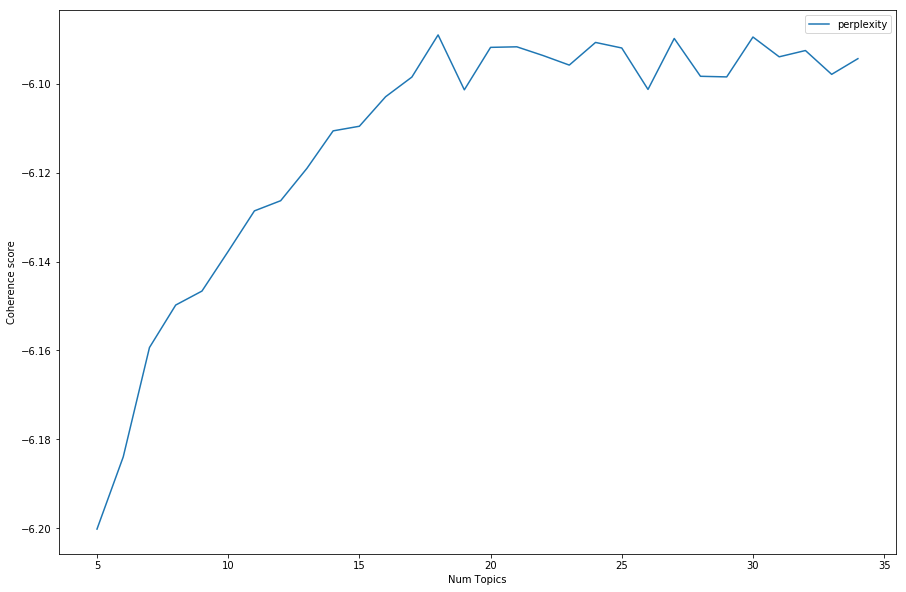

In [21]:
# Plot the required metric
limit=limit_topics; start=start_topics; step=step_topics;
x = range(start, limit, step)
plt.figure(figsize=(15,10))
# plt.plot(x, coherence_values_umass, label='umass')
# plt.plot(x, coherence_values_uci, label='uci')
# plt.plot(x, coherence_values_cv, label='c_v', marker='o')
plt.plot(x, perplexity_values, label='perplexity')
# plt.plot(x, coherence_values_npmi, label='npmi')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(loc='best')
plt.show()

Visualize the topics in pyLDAvis, first prepare the models. pyLDAvis also supports tsne plots, please see this:
https://pyldavis.readthedocs.io/en/latest/modules/API.html.

The next two cells will prepare the PCA and tsne plots for pyLDAvis

In [22]:
pyLDAvis.enable_notebook()
vis_list = []
for i in range(len(model_list)):
    vis_list.append(pyLDAvisgensim.prepare(model_list[i], corpus, id2word))

In [23]:
vis_list_tsne = []
for i in range(len(model_list)):
    print('Done for '+str(i))
    vis_list_tsne.append(pyLDAvisgensim.prepare(model_list[i], corpus, id2word, mds='tsne'))    

Done for 0
Done for 1
Done for 2
Done for 3
Done for 4
Done for 5
Done for 6
Done for 7
Done for 8
Done for 9
Done for 10
Done for 11
Done for 12
Done for 13
Done for 14
Done for 15
Done for 16
Done for 17
Done for 18
Done for 19
Done for 20
Done for 21
Done for 22
Done for 23
Done for 24
Done for 25
Done for 26
Done for 27
Done for 28
Done for 29


Save the prepared ldavis models for easy viewing next time:

In [24]:
with open("ldavis_aadhar.pkl", "wb") as pickle_out:
    pickle.dump((vis_list, vis_list_tsne), pickle_out)

with open("ldavis_aadhar.pkl", "rb") as pickle_in:
    (vis_list, vis_list_tsne) = pickle.load(pickle_in)

In [28]:
#display required topic
pyLDAvis.display(vis_list_tsne[22])

In [29]:
#Can export plot to HTML

pyLDAvis.save_html(vis_list_tsne[22], 'lda_tsne_n_topics_27_aadhar.html')

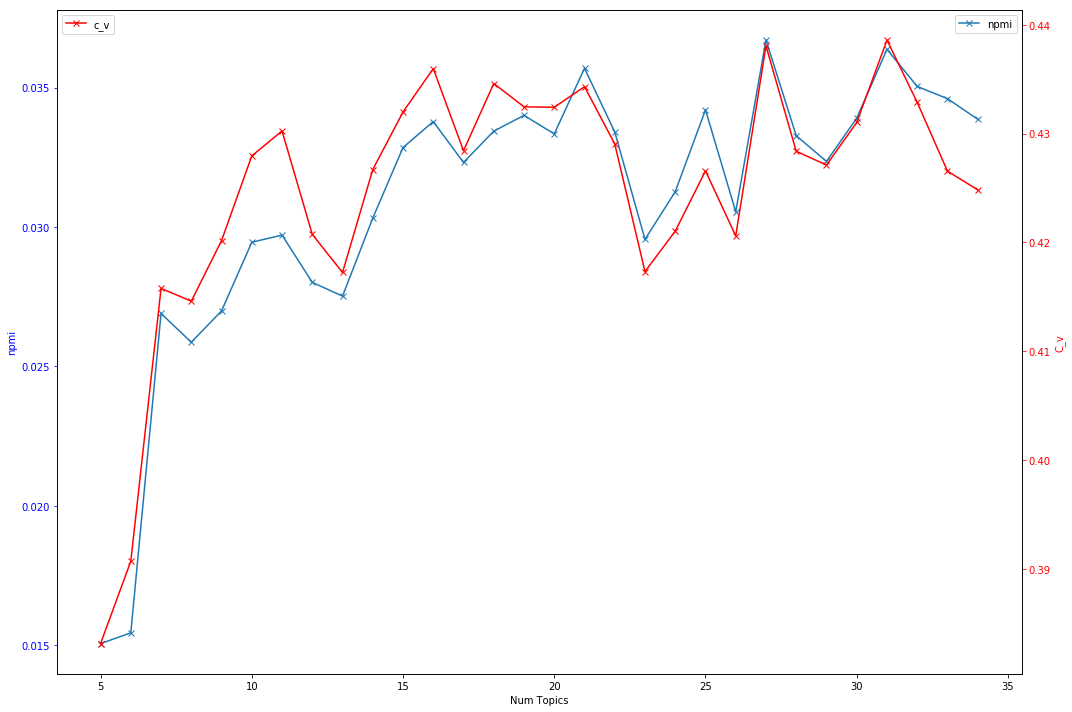

In [26]:
#to plot two metrics on different scales for comparison

fig, ax1 = plt.subplots(figsize=(15,10))
x = range(start_topics, limit_topics, step_topics)
ax1.plot(x, coherence_values_npmi, label='npmi', marker='x')
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('npmi', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='best')

ax2 = ax1.twinx()
ax2.plot(x, coherence_values_cv, label='c_v', color='r', marker='x')
ax2.set_ylabel('C_v', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()

In [27]:
for i, val in enumerate(coherence_values_cv):
    print(str(i+5) + ": " + str(val))

5: 0.38311255092623536
6: 0.3906909605586348
7: 0.4157695615769688
8: 0.41459594026523083
9: 0.42016528924398283
10: 0.4279489857319684
11: 0.43024691594803444
12: 0.4207367922973964
13: 0.41723284887044126
14: 0.42669524969092226
15: 0.43198963697197357
16: 0.4359763449829026
17: 0.4284262755048245
18: 0.43460736741082984
19: 0.4324627735574234
20: 0.43242442341423465
21: 0.434313776801602
22: 0.4290553162905957
23: 0.4173170837029308
24: 0.42103690790079745
25: 0.4265743020234706
26: 0.4205932553126544
27: 0.43806205896762307
28: 0.42837647183386307
29: 0.4271132519598512
30: 0.43102361746263157
31: 0.4385998314227721
32: 0.4328705808906279
33: 0.4265520217237324
34: 0.42482952220842585


In [30]:
best_model_idx = 22
num_topics_idx = best_model_idx + start_topics

Now let's say that the best model is model_list\[9\], we will now print out the top 50 words for this model, which has 14 topics present.

In [31]:
top_words = model_list[best_model_idx].show_topics(num_topics=-1, num_words=50, formatted=False)
cur = conn.cursor()

#cur.execute('''CREATE TABLE lda_info_new
#      (event_id INT NOT NULL,
#      aspect_id INT NOT NULL,
#      keywords TEXT[] NOT NULL,
#      probability numeric[] NOT NULL,
#      PRIMARY KEY (event_id,aspect_id));''')
      
#print ("Table created successfully")
#conn.commit()
keywords_list = []
prob_list = []

for elem in top_words:
    
    keywords_list = []
    prob_list = []
    asp_id = elem[0]
    lis = elem[1]
    for val in lis:
        keywords_list.append(str(val[0]))
        prob_list.append(float(val[1]))

    cur.execute("""INSERT INTO lda_info_new (event_id, aspect_id, keywords, probability)
    VALUES (0, %(int)s, %(str)s, %(str1)s);""",   
    {'int': asp_id, 'str': keywords_list, 'str1': prob_list})


conn.commit()
print ("Records created successfully")
conn.close()
    

Records created successfully


A way to group documents into topics is to assign topics according to the maximum probability.

If lda = LdaModel() from gensim, and corpus is the corpus made (as shown in one of the above cells where 'corpus' variable is defined)

Note `lda[corpus]` is roughly speaking a list of lists, or 2D matrix. The number of rows is the number of documents and the number of columns is the number of topics. Each matrix element is a tuple of the form (3,0.82) for example. Here 3 refers to the topic index and 0.82 the corresponding probability to be of that topic.

Here in this code, `model_list[best_model_idx][corpus]` is the LDA matrix.

So we assign to each document the topic whose probability of being present in that document is maximum. This is done by statement:

`lda_corpus = [max(prob,key=lambda y:y[1]) for prob in model_list[9][corpus] ]`

The playlists variable is the clusters. It is a list of length = num_clusters, and each element is a list of documents belonging to that cluster

In [32]:
## LDA MATRIX

model_list[best_model_idx][corpus]

In [48]:
def intersection_func(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

'''
lda_corpus = [max(prob,key=lambda y:y[1])
                    for prob in model_list[best_model_idx][corpus] ]

url_set = []
docs = coll.find({})
for doc in docs:
    url = doc['articleUrl']
    url_set.append(url)
        
cnt = 0
with open('aadhar_article_latest.csv','w') as f:
    for art in lda_corpus:
        f.write(str(art[0])+';'+str(art[1])+';'+str(url_set[cnt])+'\n')
        cnt+=1
'''
        
asp_intersect_final = np.zeros((27,20),dtype=float).tolist()
cur = conn.cursor()
        
cur.execute("SELECT event_id,aspect_id,url from art_info_final")
rows = cur.fetchall()
print ("Operation done successfully")
conn.commit()
conn.close()
art_urls = []
aspect = []

for row in rows:
   if(row[0] == 0):
      aspect.append(row[1])
      art_urls.append(row[2])
    
url_list = []
url_list_new = []
for i in range(20):
    url_list.append([])
for i in range(27):
    url_list_new.append([])
    
for i in range(len(art_urls)):
    print('done for '+str(i)+' old mappings')
    asp = aspect[i]
    for cat in asp:
        if(int(cat)!=20):
            url_list[int(cat)].append(art_urls[i].strip())
            
new_mappings = np.loadtxt('aadhar_article_latest.csv',dtype=str,delimiter=',')
new_asp = new_mappings[:,0]
new_urls = new_mappings[:,2]
intersection=0
union=0

for i in range(len(new_asp)):
    print('done for '+str(i)+' new mappings')
    asp = new_asp[i]
    url_list_new[int(asp)].append(new_urls[i].strip())
    
for i in range(len(url_list_new)):
    for j in range(20):
        intersection=len(intersection_func(url_list_new[i],url_list[j]))
        l1=len(url_list_new[i])
        l2=len(url_list[j])
        union = l1+l2-intersection
        val = float(intersection)/float(union)
        asp_intersect_final[i][j]=val
        
with open('aspect_intersection_aadhar.csv','w') as fi:
    for i in range(27):
        for j in range(20):
            fi.write(str(asp_intersect_final[i][j])+';')
        fi.write('\n')

documents = df.text.values.tolist()
playlists = [[] for i in range(num_topics_idx)]
for i, x in enumerate(lda_corpus):
    playlists[x[0]].append(documents[i])


Operation done successfully
done for 0 old mappings
done for 1 old mappings
done for 2 old mappings
done for 3 old mappings
done for 4 old mappings
done for 5 old mappings
done for 6 old mappings
done for 7 old mappings
done for 8 old mappings
done for 9 old mappings
done for 10 old mappings
done for 11 old mappings
done for 12 old mappings
done for 13 old mappings
done for 14 old mappings
done for 15 old mappings
done for 16 old mappings
done for 17 old mappings
done for 18 old mappings
done for 19 old mappings
done for 20 old mappings
done for 21 old mappings
done for 22 old mappings
done for 23 old mappings
done for 24 old mappings
done for 25 old mappings
done for 26 old mappings
done for 27 old mappings
done for 28 old mappings
done for 29 old mappings
done for 30 old mappings
done for 31 old mappings
done for 32 old mappings
done for 33 old mappings
done for 34 old mappings
done for 35 old mappings
done for 36 old mappings
done for 37 old mappings
done for 38 old mappings
done fo

done for 3242 old mappings
done for 3243 old mappings
done for 3244 old mappings
done for 3245 old mappings
done for 3246 old mappings
done for 3247 old mappings
done for 3248 old mappings
done for 3249 old mappings
done for 3250 old mappings
done for 3251 old mappings
done for 3252 old mappings
done for 3253 old mappings
done for 3254 old mappings
done for 3255 old mappings
done for 3256 old mappings
done for 3257 old mappings
done for 3258 old mappings
done for 3259 old mappings
done for 3260 old mappings
done for 3261 old mappings
done for 3262 old mappings
done for 3263 old mappings
done for 3264 old mappings
done for 3265 old mappings
done for 3266 old mappings
done for 3267 old mappings
done for 3268 old mappings
done for 3269 old mappings
done for 3270 old mappings
done for 3271 old mappings
done for 3272 old mappings
done for 3273 old mappings
done for 3274 old mappings
done for 3275 old mappings
done for 3276 old mappings
done for 3277 old mappings
done for 3278 old mappings
d

done for 6742 old mappings
done for 6743 old mappings
done for 6744 old mappings
done for 6745 old mappings
done for 6746 old mappings
done for 6747 old mappings
done for 6748 old mappings
done for 6749 old mappings
done for 6750 old mappings
done for 6751 old mappings
done for 6752 old mappings
done for 6753 old mappings
done for 6754 old mappings
done for 6755 old mappings
done for 6756 old mappings
done for 6757 old mappings
done for 6758 old mappings
done for 6759 old mappings
done for 6760 old mappings
done for 6761 old mappings
done for 6762 old mappings
done for 6763 old mappings
done for 6764 old mappings
done for 6765 old mappings
done for 6766 old mappings
done for 6767 old mappings
done for 6768 old mappings
done for 6769 old mappings
done for 6770 old mappings
done for 6771 old mappings
done for 6772 old mappings
done for 6773 old mappings
done for 6774 old mappings
done for 6775 old mappings
done for 6776 old mappings
done for 6777 old mappings
done for 6778 old mappings
d

done for 10741 old mappings
done for 10742 old mappings
done for 10743 old mappings
done for 10744 old mappings
done for 10745 old mappings
done for 10746 old mappings
done for 10747 old mappings
done for 10748 old mappings
done for 10749 old mappings
done for 10750 old mappings
done for 10751 old mappings
done for 10752 old mappings
done for 10753 old mappings
done for 10754 old mappings
done for 10755 old mappings
done for 10756 old mappings
done for 10757 old mappings
done for 10758 old mappings
done for 10759 old mappings
done for 10760 old mappings
done for 10761 old mappings
done for 10762 old mappings
done for 10763 old mappings
done for 10764 old mappings
done for 10765 old mappings
done for 10766 old mappings
done for 10767 old mappings
done for 10768 old mappings
done for 10769 old mappings
done for 10770 old mappings
done for 10771 old mappings
done for 10772 old mappings
done for 10773 old mappings
done for 10774 old mappings
done for 10775 old mappings
done for 10776 old m

done for 0 new mappings
done for 1 new mappings
done for 2 new mappings
done for 3 new mappings
done for 4 new mappings
done for 5 new mappings
done for 6 new mappings
done for 7 new mappings
done for 8 new mappings
done for 9 new mappings
done for 10 new mappings
done for 11 new mappings
done for 12 new mappings
done for 13 new mappings
done for 14 new mappings
done for 15 new mappings
done for 16 new mappings
done for 17 new mappings
done for 18 new mappings
done for 19 new mappings
done for 20 new mappings
done for 21 new mappings
done for 22 new mappings
done for 23 new mappings
done for 24 new mappings
done for 25 new mappings
done for 26 new mappings
done for 27 new mappings
done for 28 new mappings
done for 29 new mappings
done for 30 new mappings
done for 31 new mappings
done for 32 new mappings
done for 33 new mappings
done for 34 new mappings
done for 35 new mappings
done for 36 new mappings
done for 37 new mappings
done for 38 new mappings
done for 39 new mappings
done for 4

done for 3431 new mappings
done for 3432 new mappings
done for 3433 new mappings
done for 3434 new mappings
done for 3435 new mappings
done for 3436 new mappings
done for 3437 new mappings
done for 3438 new mappings
done for 3439 new mappings
done for 3440 new mappings
done for 3441 new mappings
done for 3442 new mappings
done for 3443 new mappings
done for 3444 new mappings
done for 3445 new mappings
done for 3446 new mappings
done for 3447 new mappings
done for 3448 new mappings
done for 3449 new mappings
done for 3450 new mappings
done for 3451 new mappings
done for 3452 new mappings
done for 3453 new mappings
done for 3454 new mappings
done for 3455 new mappings
done for 3456 new mappings
done for 3457 new mappings
done for 3458 new mappings
done for 3459 new mappings
done for 3460 new mappings
done for 3461 new mappings
done for 3462 new mappings
done for 3463 new mappings
done for 3464 new mappings
done for 3465 new mappings
done for 3466 new mappings
done for 3467 new mappings
d

done for 7431 new mappings
done for 7432 new mappings
done for 7433 new mappings
done for 7434 new mappings
done for 7435 new mappings
done for 7436 new mappings
done for 7437 new mappings
done for 7438 new mappings
done for 7439 new mappings
done for 7440 new mappings
done for 7441 new mappings
done for 7442 new mappings
done for 7443 new mappings
done for 7444 new mappings
done for 7445 new mappings
done for 7446 new mappings
done for 7447 new mappings
done for 7448 new mappings
done for 7449 new mappings
done for 7450 new mappings
done for 7451 new mappings
done for 7452 new mappings
done for 7453 new mappings
done for 7454 new mappings
done for 7455 new mappings
done for 7456 new mappings
done for 7457 new mappings
done for 7458 new mappings
done for 7459 new mappings
done for 7460 new mappings
done for 7461 new mappings
done for 7462 new mappings
done for 7463 new mappings
done for 7464 new mappings
done for 7465 new mappings
done for 7466 new mappings
done for 7467 new mappings
d

done for 11430 new mappings
done for 11431 new mappings
done for 11432 new mappings
done for 11433 new mappings
done for 11434 new mappings
done for 11435 new mappings
done for 11436 new mappings
done for 11437 new mappings
done for 11438 new mappings
done for 11439 new mappings
done for 11440 new mappings
done for 11441 new mappings
done for 11442 new mappings
done for 11443 new mappings
done for 11444 new mappings
done for 11445 new mappings
done for 11446 new mappings
done for 11447 new mappings
done for 11448 new mappings
done for 11449 new mappings
done for 11450 new mappings
done for 11451 new mappings
done for 11452 new mappings
done for 11453 new mappings
done for 11454 new mappings
done for 11455 new mappings
done for 11456 new mappings
done for 11457 new mappings
done for 11458 new mappings
done for 11459 new mappings
done for 11460 new mappings
done for 11461 new mappings
done for 11462 new mappings
done for 11463 new mappings
done for 11464 new mappings
done for 11465 new m

In [49]:
# To view the number of documents in each cluster
lengths = [len(playlists[i]) for i in range(len(playlists))]
lengths

[527,
 272,
 342,
 432,
 203,
 177,
 705,
 607,
 1068,
 549,
 163,
 550,
 198,
 276,
 301,
 455,
 197,
 646,
 206,
 1183,
 492,
 404,
 504,
 660,
 599,
 630,
 463]

Let us generate the final file, randomly choosing 20 documents from each cluster. The final file will have the structure:

Num_topics = num_topics

Topic \#0:
    Top 50 words: ....
    
    Sample 20 documents: ...
    
        1. Doc 1
        2. Doc 2
        .
        .
        .

Topic \#1:
    Top 50 words: ....
    
    Sample 20 documents: ...
    
        1. Doc 1
        2. Doc 2
        .
        .
        .
        
        
   

In [50]:
num_documents_to_print_per_cluster = 20
with open("./output_LDA_aadhar_n_" + str(num_topics_idx) + ".txt", "w") as output_file:
    for x,y in zip(top_words, playlists):
        output_file.write("Topic #" + str(x[0]) + " - Top 50 words are: (word - probability)\n")
        for tuple in x[1]:
            output_file.write("\t" + tuple[0] + " -  " + str(tuple[1]) + "\n")

        output_file.write('\n\n')

        for i in range(num_documents_to_print_per_cluster):
            doc_idx = random.randint(0, len(y)-1)

            output_file.write("Document #" + str(i+1) + ":" + "\n")
            print(doc_idx)
            output_file.write(y[doc_idx] + "\n")
            output_file.write('\n')


        output_file.write('------------------------------')
        output_file.write('\n')

449
34
376
475
505
70
341
127
203
460
47
236
173
20
144
66
380
461
410
187
173
122
230
19
248
8
0
53
141
270
51
75
154
146
221
18
139
142
94
59
290
332
46
200
243
168
279
233
213
166
226
164
265
90
132
224
266
277
70
149
393
74
153
186
246
429
111
427
169
20
126
398
279
345
57
316
81
383
319
15
53
18
118
163
146
125
202
13
132
166
131
72
56
139
198
41
159
78
179
41
76
118
114
135
129
8
11
90
163
24
147
102
169
95
129
128
144
154
77
100
487
511
134
315
166
574
36
1
512
178
148
223
350
357
482
617
243
609
79
299
225
126
564
152
112
456
169
44
323
49
46
94
530
528
377
2
133
430
602
590
81
809
358
544
1061
653
922
36
733
25
454
623
518
661
933
231
476
1023
960
571
271
270
275
246
455
458
129
449
125
532
475
338
338
419
259
256
374
96
111
268
101
92
6
128
154
43
147
23
112
55
37
90
122
153
60
14
126
126
23
154
535
155
357
156
430
351
522
229
512
425
303
420
231
484
468
64
423
303
104
356
23
163
186
95
163
22
184
17
179
170
97
11
177
154
172
107
172
139
38
47
184
117
139
163
256
112
169
269


In [51]:
#Can export plot to HTML

pyLDAvis.save_html(vis_list[best_model_idx], './demon_lda_tsne_27_topics_' + str(num_topics_idx) + '.html')